In [1]:
import matplotlib.pyplot as plt
from load import load_2023_12_30
from tile import Tile
from track import Track
from signal_processing import maxIndex

a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30_runs = load_2023_12_30()

A50 Downhill Tracks
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Downhill | Date 2023-12-30 | Time 12:18:53 | Duration [s] 114 | Length [m] 1032
	 Track type Downhill | Date 2023-12-30 | Time 12:21:47 | Duration [s] 40 | Length [m] 111
A50 All Tracks
	 Track type Hold | Date 2023-12-30 | Time 11:52:15 | Duration [s] 110 | Length [m] 36
	 Track type Walk | Date 2023-12-30 | Time 11:54:05 | Duration [s] 103 | Length [m] 56
	 Track type Hold | Date 2023-12-30 | Time 11:55:48 | Duration [s] 74 | Length [m] 22
	 Track type Walk | Date 2023-12-30 | Time 11:57:02 | Duration [s] 82 | Length [m] 53
	 Track type Lift | Date 2023-12-30 | Time 11:58:24 | Duration [s] 485 | Length [m] 862
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Walk | Date 2023-12-30 | Time 12:08:24 | Duration [s] 92 | Length [m] 75
	 Track type Lift | Date 2023-12-30 | Time 12:09:56 | Duration [s] 410 | Leng

## Plotting Euler Data with G-forces

G-forces should register at twice the frequency due to similar angular accelerations felt at every turn, while rolling should occur +ve, then -ve between turns. Assuming this, we can clearly calculate the number of turns and determine if they were left or right.

In [2]:
run1 = tile_2023_12_30_runs[0]
run2 = tile_2023_12_30_runs[1]

In [3]:
run1_2023_12_30_euler6 = run1.euler6
run1_2023_12_30_euler9 = run1.euler9

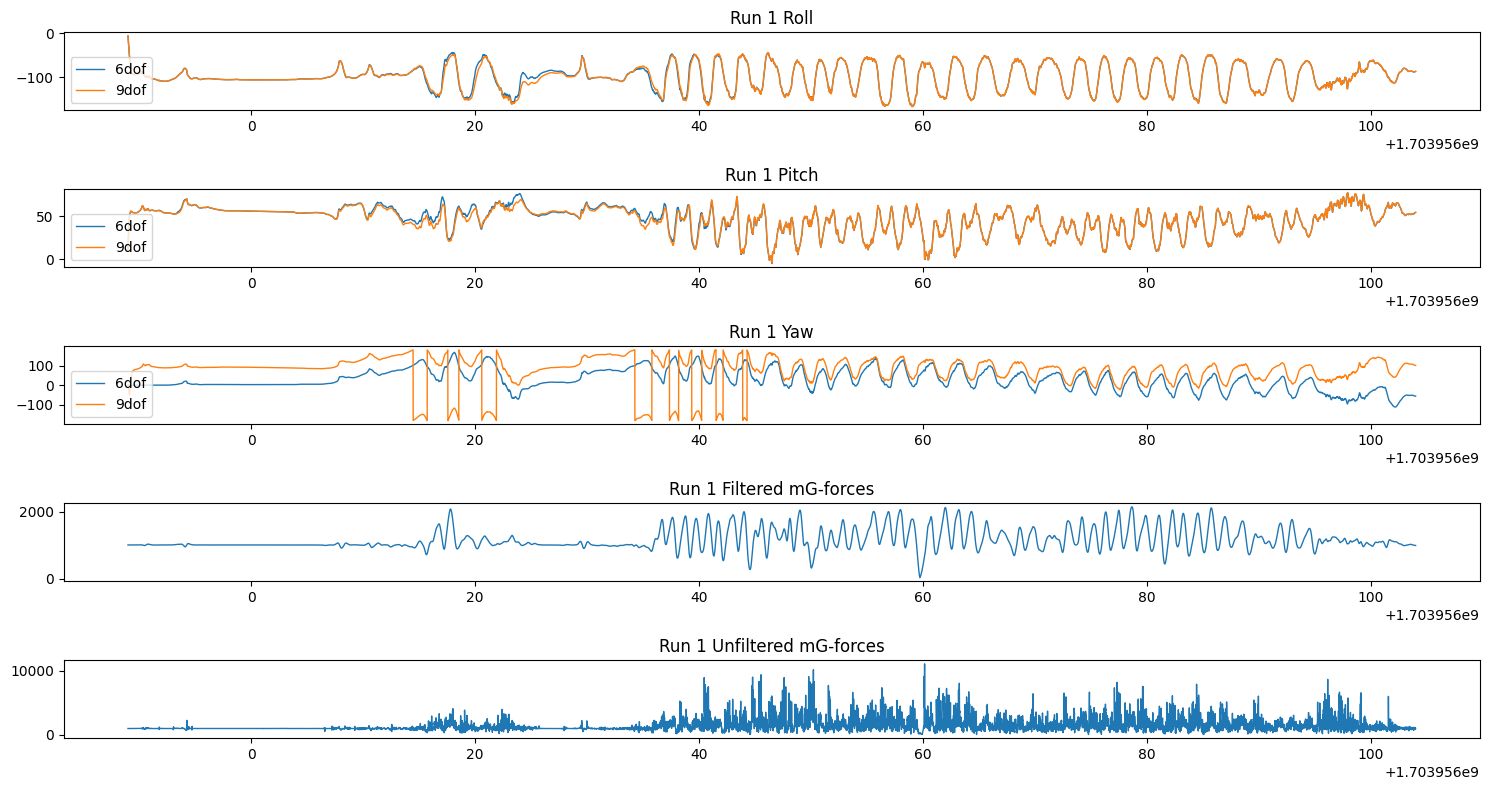

In [4]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(5, figsize=(15, 8))

ax[0].plot(run1.time, run1_2023_12_30_euler6[:, 0], label='6dof')
ax[0].plot(run1.time, run1_2023_12_30_euler9[:, 0], label='9dof')
ax[0].set_title('Run 1 Roll', wrap=True)
ax[0].legend()

ax[1].plot(run1.time, run1_2023_12_30_euler6[:, 1], label='6dof')
ax[1].plot(run1.time, run1_2023_12_30_euler9[:, 1], label='9dof')
ax[1].set_title('Run 1 Pitch', wrap=True)
ax[1].legend()

ax[2].plot(run1.time, run1_2023_12_30_euler6[:, 2], label='6dof')
ax[2].plot(run1.time, run1_2023_12_30_euler9[:, 2], label='9dof')
ax[2].set_title('Run 1 Yaw', wrap=True)
ax[2].legend()

ax[3].plot(run1.time, run1.mG_lpf())
ax[3].set_title('Run 1 Filtered mG-forces', wrap=True)

ax[4].plot(run1.time, run1.mG)
ax[4].set_title('Run 1 Unfiltered mG-forces', wrap=True)

plt.tight_layout()
plt.show()

## Identifying the Still Points



In [5]:
_, _, _, tile_2023_12_30 = load_2023_12_30(split_tile=False)

A50 Downhill Tracks
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Downhill | Date 2023-12-30 | Time 12:18:53 | Duration [s] 114 | Length [m] 1032
	 Track type Downhill | Date 2023-12-30 | Time 12:21:47 | Duration [s] 40 | Length [m] 111
A50 All Tracks
	 Track type Hold | Date 2023-12-30 | Time 11:52:15 | Duration [s] 110 | Length [m] 36
	 Track type Walk | Date 2023-12-30 | Time 11:54:05 | Duration [s] 103 | Length [m] 56
	 Track type Hold | Date 2023-12-30 | Time 11:55:48 | Duration [s] 74 | Length [m] 22
	 Track type Walk | Date 2023-12-30 | Time 11:57:02 | Duration [s] 82 | Length [m] 53
	 Track type Lift | Date 2023-12-30 | Time 11:58:24 | Duration [s] 485 | Length [m] 862
	 Track type Downhill | Date 2023-12-30 | Time 12:06:29 | Duration [s] 115 | Length [m] 977
	 Track type Walk | Date 2023-12-30 | Time 12:08:24 | Duration [s] 92 | Length [m] 75
	 Track type Lift | Date 2023-12-30 | Time 12:09:56 | Duration [s] 410 | Leng

In [6]:
a50_lifts = [track for track in a50_all_2023_12_30 if track.track_type == "Lift"]

In [7]:
def addRunAndLiftZones(ax, runs, lifts):
    [ax.axvspan(run.time[0], run.time[-1], color='green', alpha=0.25) for run in runs]
    [ax.axvspan(lift.time[0], lift.time[-1], color='red', alpha=0.25) for lift in lifts]

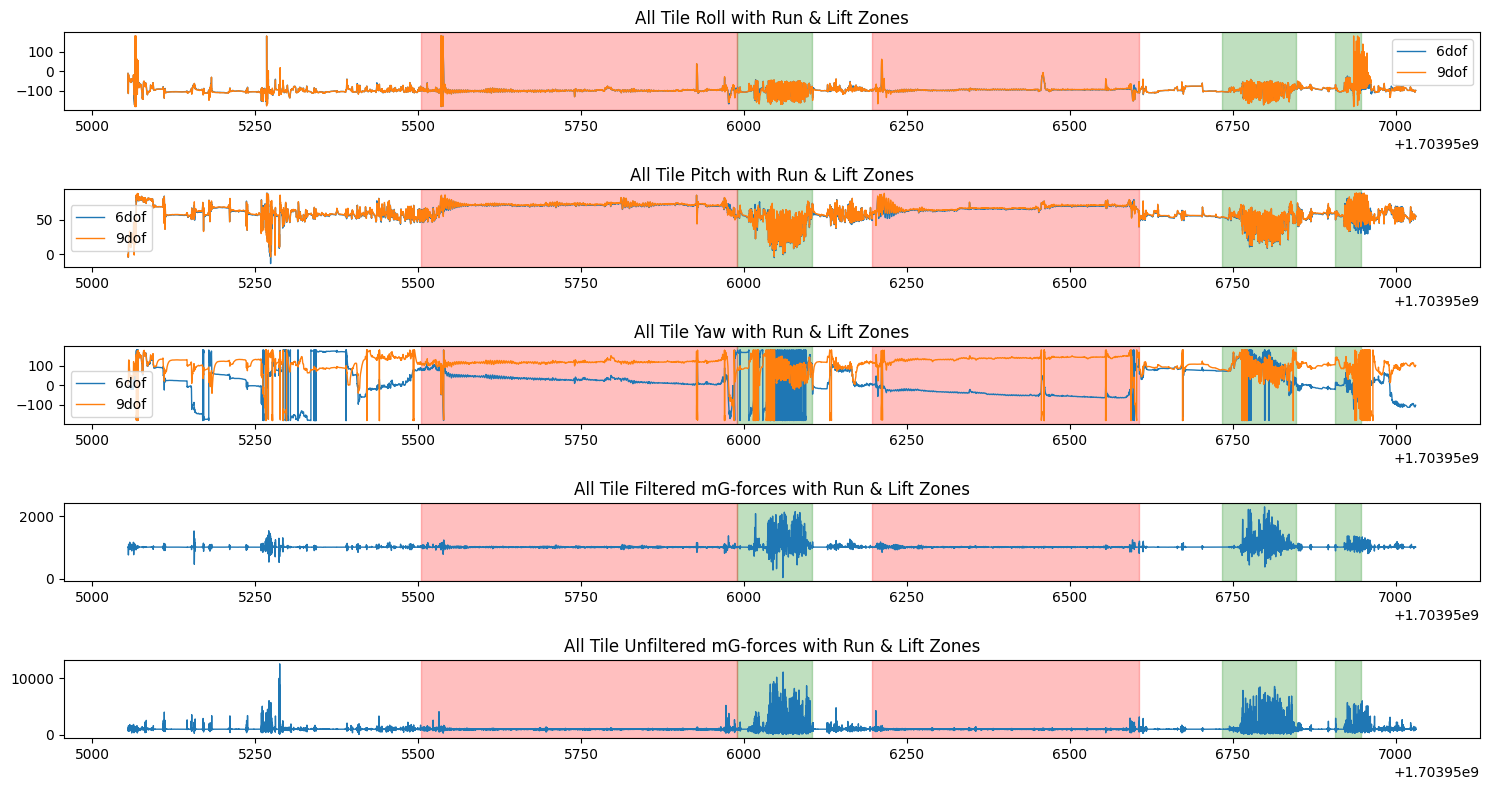

In [8]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(5, figsize=(15, 8))

ax[0].plot(tile_2023_12_30.time, tile_2023_12_30.euler6[:, 0], label='6dof')
ax[0].plot(tile_2023_12_30.time, tile_2023_12_30.euler9[:, 0], label='9dof')
addRunAndLiftZones(ax[0], tile_2023_12_30_runs, a50_lifts)
ax[0].set_title('All Tile Roll with Run & Lift Zones', wrap=True)
ax[0].legend()

ax[1].plot(tile_2023_12_30.time, tile_2023_12_30.euler6[:, 1], label='6dof')
ax[1].plot(tile_2023_12_30.time, tile_2023_12_30.euler9[:, 1], label='9dof')
addRunAndLiftZones(ax[1], tile_2023_12_30_runs, a50_lifts)
ax[1].set_title('All Tile Pitch with Run & Lift Zones', wrap=True)
ax[1].legend()

ax[2].plot(tile_2023_12_30.time, tile_2023_12_30.euler6[:, 2], label='6dof')
ax[2].plot(tile_2023_12_30.time, tile_2023_12_30.euler9[:, 2], label='9dof')
addRunAndLiftZones(ax[2], tile_2023_12_30_runs, a50_lifts)
ax[2].set_title('All Tile Yaw with Run & Lift Zones', wrap=True)
ax[2].legend()

ax[3].plot(tile_2023_12_30.time, tile_2023_12_30.mG_lpf())
addRunAndLiftZones(ax[3], tile_2023_12_30_runs, a50_lifts)
ax[3].set_title('All Tile Filtered mG-forces with Run & Lift Zones', wrap=True)

ax[4].plot(tile_2023_12_30.time, tile_2023_12_30.mG)
addRunAndLiftZones(ax[4], tile_2023_12_30_runs, a50_lifts)
ax[4].set_title('All Tile Unfiltered mG-forces with Run & Lift Zones', wrap=True)

plt.tight_layout()
plt.show()

### At the Point of Lift Liftoff

Taking a closer look at the start of the lift zone, starting with the first lift:

In [9]:
start = tile_2023_12_30.time.index(a50_lifts[0].time[0])
x1 = start - 2500 # sub time to window
x2 = start + 2500 # add time to window
print(x1, x2)

42400 47400


In [10]:
impact_idx = maxIndex(tile_2023_12_30.mG, [x1, x2])

In [11]:
def plotEulerAndGs(x1, x2):
    plt.rc('lines', linewidth=1)
    fig, ax = plt.subplots(6, figsize=(14, 9))

    ax[0].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.corrected_alt[x1:x2], label='tile')
    ax[0].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[0].set_title('Moment of Lift 1 Liftoff Tile Altitude (Correced from A50)', wrap=True)
    ax[0].legend()

    ax[1].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler6[x1:x2, 0], label='6dof')
    ax[1].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler9[x1:x2, 0], label='9dof')
    ax[1].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[1].set_title('Moment of Lift 1 Liftoff Tile Roll', wrap=True)
    ax[1].legend()

    ax[2].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler6[x1:x2, 1], label='6dof')
    ax[2].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler9[x1:x2, 1], label='9dof')
    ax[2].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[2].set_title('Moment of Lift 1 Liftoff Tile Pitch', wrap=True)
    ax[2].legend()

    ax[3].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler6[x1:x2, 2], label='6dof')
    ax[3].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.euler9[x1:x2, 2], label='9dof')
    ax[3].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[3].set_title('Moment of Lift 1 Liftoff Tile Yaw', wrap=True)
    ax[3].legend()

    ax[4].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.mG_lpf()[x1:x2])
    ax[4].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[4].set_title('Moment of Lift 1 Liftoff Tile Filtered mG-forces', wrap=True)

    ax[5].plot(tile_2023_12_30.time[x1:x2], tile_2023_12_30.mG[x1:x2])
    ax[5].axvline(x=tile_2023_12_30.time[impact_idx], color='k')
    ax[5].set_title('Moment of Lift 1 Liftoff Tile Unfiltered mG-forces', wrap=True)

    plt.tight_layout()
    plt.show()

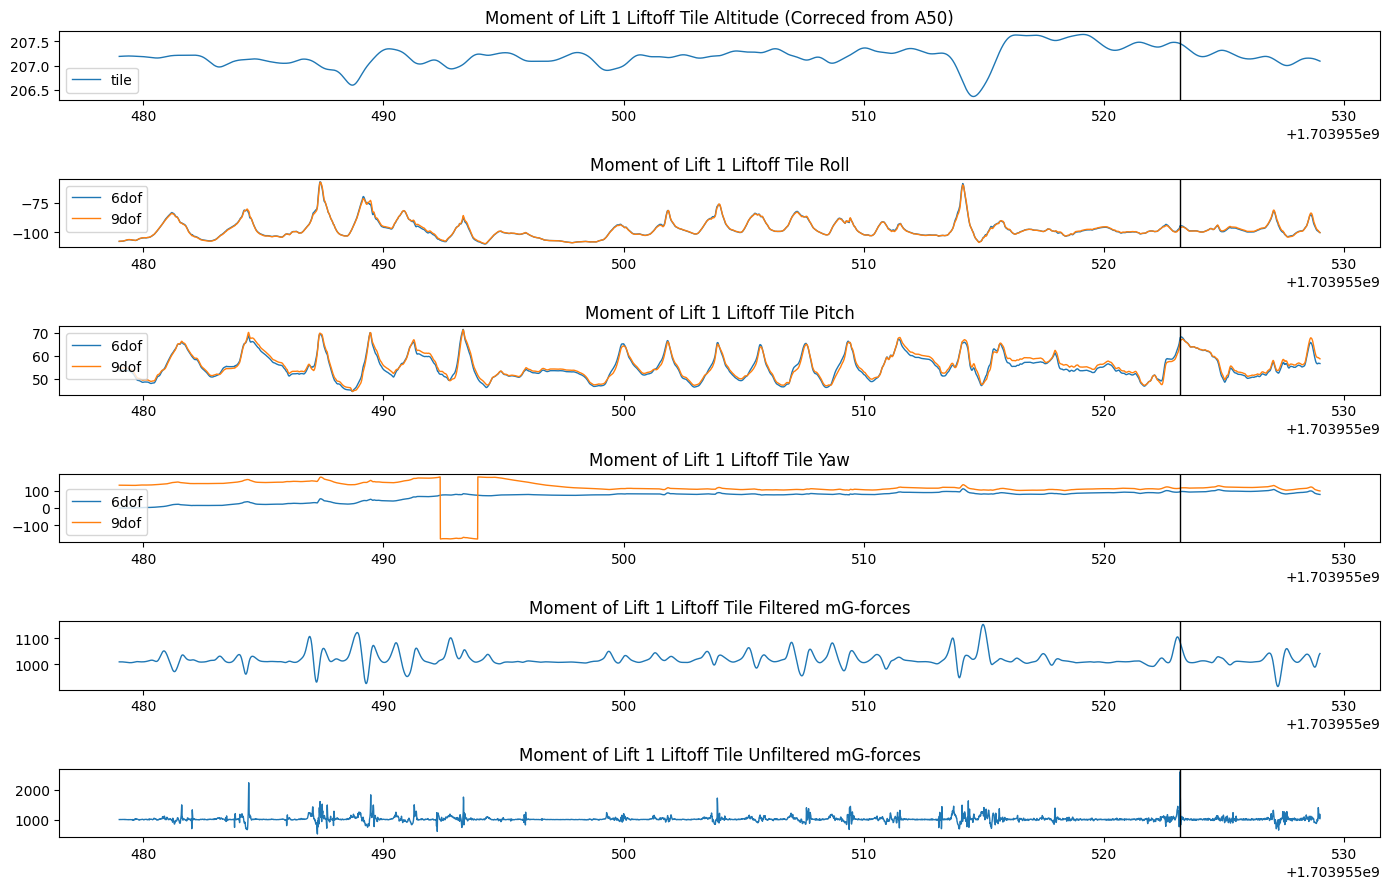

In [12]:
plotEulerAndGs(x1, x2)

#### Analysis

- the first flat period is waiting in line for the gate to open, not always available
- the second is standing waiting for the lift to hit the legs, seen by the impulse in the unfiltered mG-forces
  - motion during this time may happen, only correct for times it doesn't since this will always happen

### At the Point of Lift Landing

Taking a closer look at the end of the lift zone, starting with the first lift:

90900 95900


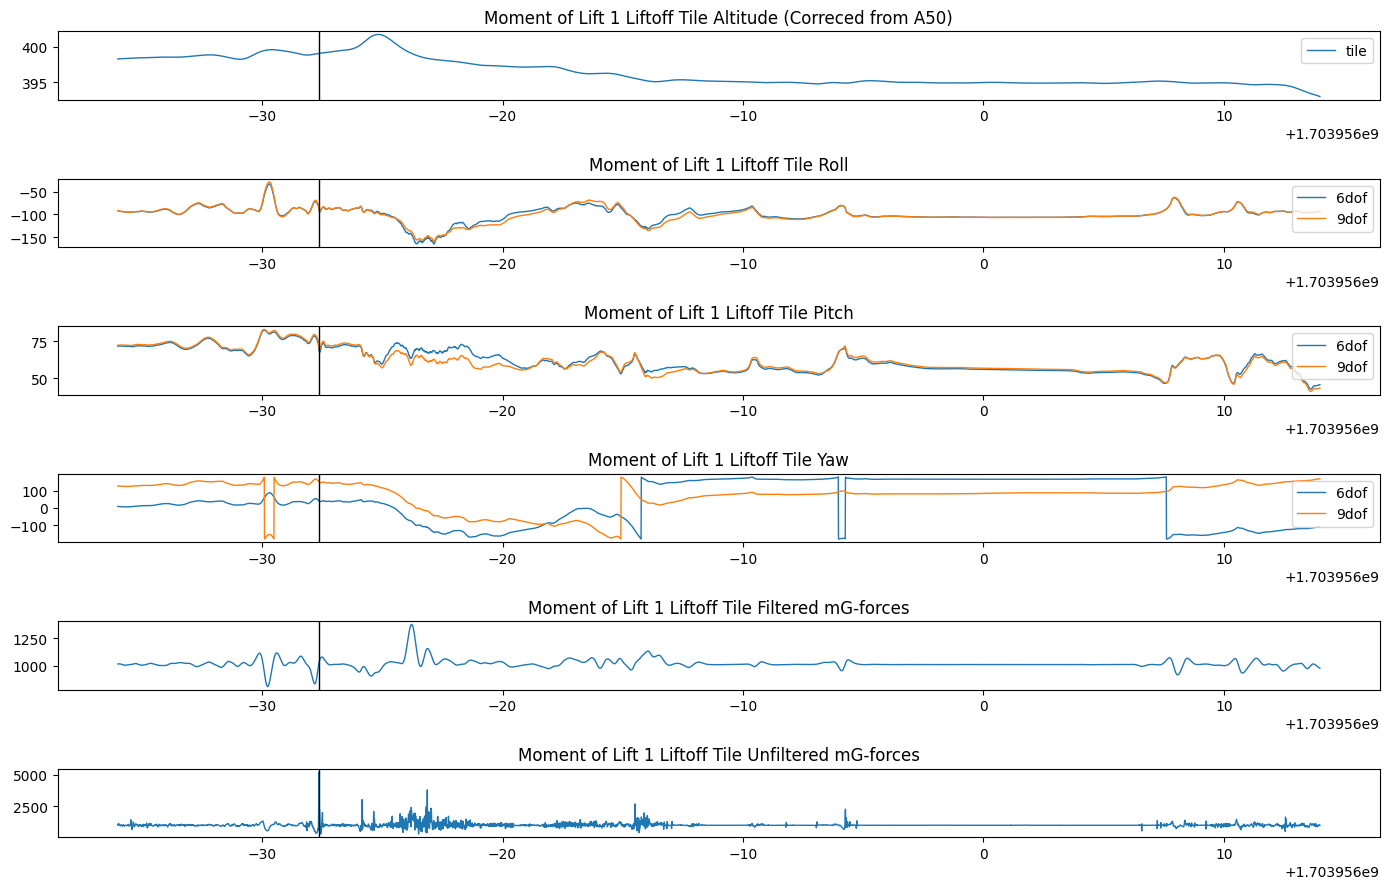

In [13]:
stop = tile_2023_12_30.time.index(a50_lifts[0].time[-1])
x1 = stop - 2500 # sub time to window
x2 = stop + 2500 # add time to window
print(x1, x2)
impact_idx = maxIndex(tile_2023_12_30.mG, [x1, x2])
plotEulerAndGs(x1, x2)

#### Analysis

- the main flat period is seen as the point where the chair is pushing you while your skis are flat on the platform
- results in a pretty good steady state for all signals!

#### Confirming this Occurs on the Next Chair Landing

152600 157600


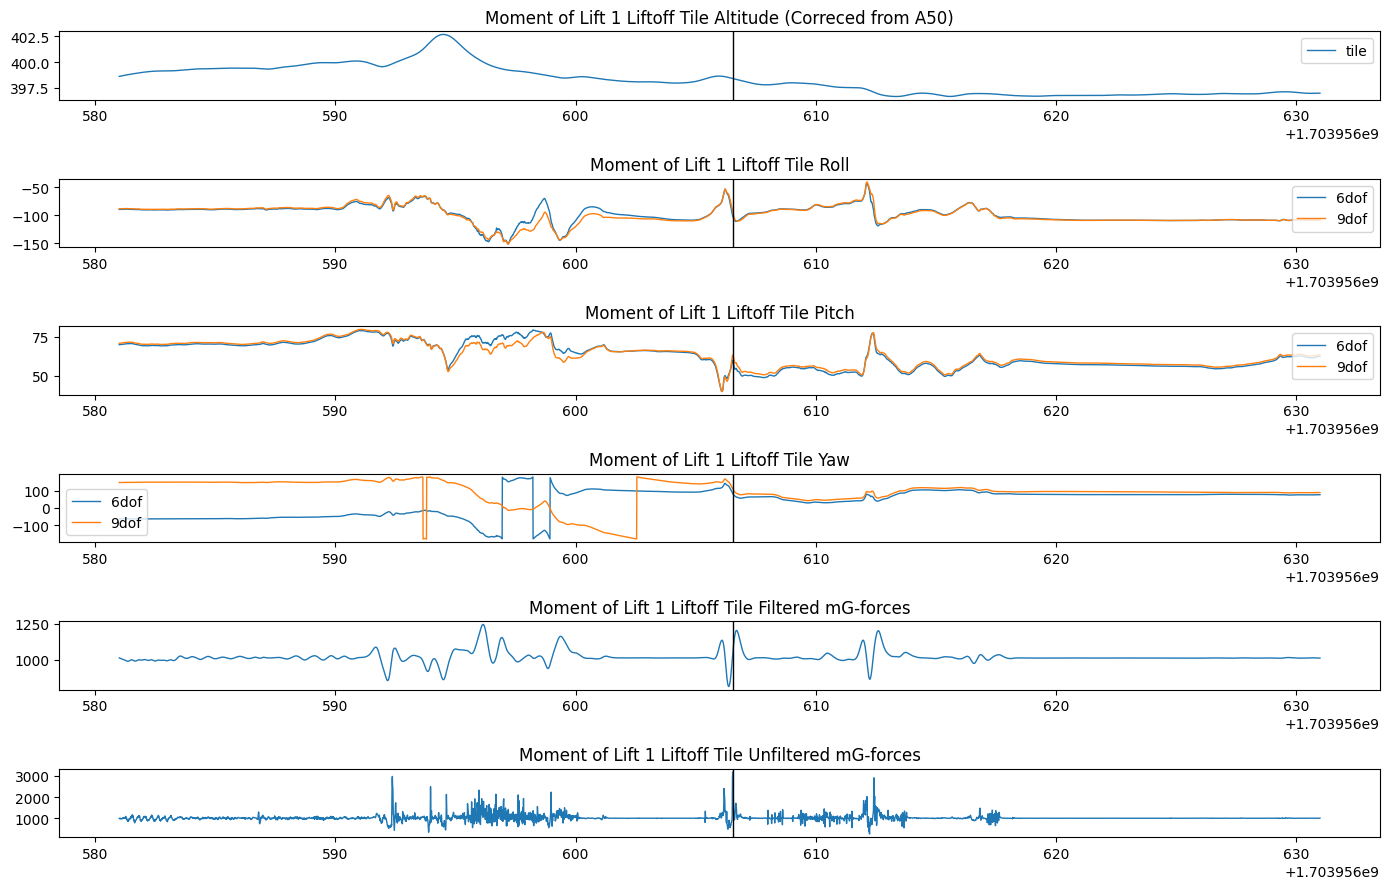

In [14]:
stop = tile_2023_12_30.time.index(a50_lifts[1].time[-1])
x1 = stop - 2500 # sub time to window
x2 = stop + 2500 # add time to window
print(x1, x2)
impact_idx = maxIndex(tile_2023_12_30.mG, [x1, x2])
plotEulerAndGs(x1, x2)

## Identification Steps

0. must first be in lift state, identified by constant acc (& vel), and increasing altitude
1. triggered by altitude & when it begins decreasing from its max
2. search all signals in +t until a medium window has a low enough std dev
3. confirm an impact in the unfiltered mG was observed, to isolate the cases where the chair stopped
4. confirm altitude never increses, otherwise break
5. capture signals during a small window of low std dev, stretching to the length of time SS is observed

In [73]:
from numpy import std
# from signal_processing import std

def testMotionForStillness(tile, r):
    # alt_lpf_std_th = 3
    # roll_std_th = 5
    # pitch_std_th = 5
    # yaw_std_th = 5
    euler_std_th = 3
    # mG_lpf_std_th = 25
    mG_std_th = 50
    return [
        # std(tile.corrected_alt[r[0]:r[1]]) < alt_lpf_std_th,
        # std(tile.euler9[r[0]:r[1], 0]) < roll_std_th,
        # std(tile.euler9[r[0]:r[1], 1]) < pitch_std_th,
        # std(tile.euler9[r[0]:r[1], 2]) < yaw_std_th,
        std(tile.euler9_norm[r[0]:r[1]]) < euler_std_th,
        # std(tile.mG_lpf()[r[0]:r[1]]) < mG_lpf_std_th,
        std(tile.mG[r[0]:r[1]]) < mG_std_th,
    ]

In [76]:
def identifyStillRanges(tile: Tile, min_s=6, r=None, print_out=False):
    """Identifies ranges of still motion with sampling length `min_s` in seconds
    and returns them as a list of lists representing their indices.
    """
    wsamples = min_s * 100
    search = (len(tile.time)if r is None else r) - wsamples
    coarse_mult = wsamples
    fine_mult = round(coarse_mult / 10)
    still_ranges = []
    prev_tail = 0
    print('search:', search)
    print('coarse_mult:', coarse_mult)
    print('fine_mult:', fine_mult)

    for i in range(search):
        if print_out: print('i iter:\t', i)
        for j in range(search):
            # coarse search every 10th idx
            head = prev_tail + coarse_mult * j
            tail = head + wsamples
            
            # if the coarse searching tail exceeds the max search, return
            if tail >= search:
                if print_out: print('hit the end of the line. tail >= search:', tail, '>=', search)
                return still_ranges
            
            trailing_tests = testMotionForStillness(tile, [head, tail])

            if print_out: print('j iter:\t', j)
            if print_out: print('head = prev_tail + coarse_mult * j:\t', head, '=', prev_tail, '+', coarse_mult * j)
            if print_out: print('tail = head + wsamples:\t', tail, '=', head, '+', wsamples)
            if print_out: print('still_tests:\t', trailing_tests)
            
            if sum(trailing_tests) == len(trailing_tests):
                if print_out: print('\tcoarse range found:\t', head, tail)
                refinedHead = None
                refinedTail = None
                for k in range(search - j):
                    # fine search every idx
                    fine_leading_head = head - fine_mult * (k + 1)
                    fine_leading_tail = tail - fine_mult * (k + 1)
                    fine_trailing_head = head + fine_mult * (k + 1)
                    fine_trailing_tail = tail + fine_mult * (k + 1)

                    if print_out: print('\tk iter:\t', k)
                    if print_out: print('\tfine_leading_head = head - fine_mult * k + 1:\t', fine_leading_head, '=', head, '-', fine_mult, '*', (k + 1))
                    if print_out: print('\tfine_leading_tail = tail - fine_mult * k + 1:\t', fine_leading_tail, '=', tail, '-', fine_mult, '*', (k + 1))
                    if print_out: print('\tfine_trailing_head = head + fine_mult * k + 1:\t', fine_trailing_head, '=', head, '+', fine_mult, '*', (k + 1))
                    if print_out: print('\tfine_trailing_tail = tail + fine_mult * k + 1:\t', fine_trailing_tail, '=', tail, '+', fine_mult, '*', (k + 1))

                    if refinedHead is None:
                        # if the fine searching tail exceeds the max search, return
                        if fine_leading_head <= 0:
                            refinedHead = 0
                            print('\t\trefined head set:\t', refinedHead)
                        
                        leading_tests = testMotionForStillness(tile, [fine_leading_head, fine_leading_tail])
                        if print_out: print('\tleading_tests:\t', leading_tests)

                        if sum(leading_tests) < len(leading_tests):
                            refinedHead = fine_leading_head + fine_mult
                            print('\t\trefined head set:\t', refinedHead)

                    if refinedTail is None:
                        # if the fine searching tail exceeds the max search, return
                        if fine_trailing_tail >= search:
                            refinedTail = fine_trailing_tail
                            print('\t\trefined tail set:\t', refinedTail)

                        trailing_tests = testMotionForStillness(tile, [fine_trailing_head, fine_trailing_tail])
                        if print_out: print('\ttrailing_tests:\t', trailing_tests)

                        if sum(trailing_tests) < len(trailing_tests):
                            refinedTail = fine_trailing_tail - fine_mult
                            if print_out: print('\t\trefined tail set:\t', refinedTail)

                    if refinedHead is not None and refinedTail is not None:
                        if refinedHead < prev_tail:
                            if print_out: print('\t\tstitched to previous set:\t', still_ranges[-1][0], refinedTail)
                            still_ranges[-1] = [still_ranges[-1][0], refinedTail]
                        else:
                            if print_out: print('\t\trefined still range set:\t', [refinedHead, refinedTail])
                            still_ranges.append([refinedHead, refinedTail])
                        prev_tail = refinedTail
                        break
                break

In [77]:
r = len(tile_2023_12_30.time)
still_ranges = identifyStillRanges(tile_2023_12_30, r=r, print_out=True)

search: 196947
coarse_mult: 600
fine_mult: 60
i iter:	 0
j iter:	 0
head = prev_tail + coarse_mult * j:	 0 = 0 + 0
tail = head + wsamples:	 600 = 0 + 600
still_tests:	 [False, False]
j iter:	 1
head = prev_tail + coarse_mult * j:	 600 = 0 + 600
tail = head + wsamples:	 1200 = 600 + 600
still_tests:	 [False, False]
j iter:	 2
head = prev_tail + coarse_mult * j:	 1200 = 0 + 1200
tail = head + wsamples:	 1800 = 1200 + 600
still_tests:	 [False, False]
j iter:	 3
head = prev_tail + coarse_mult * j:	 1800 = 0 + 1800
tail = head + wsamples:	 2400 = 1800 + 600
still_tests:	 [False, True]
j iter:	 4
head = prev_tail + coarse_mult * j:	 2400 = 0 + 2400
tail = head + wsamples:	 3000 = 2400 + 600
still_tests:	 [False, False]
j iter:	 5
head = prev_tail + coarse_mult * j:	 3000 = 0 + 3000
tail = head + wsamples:	 3600 = 3000 + 600
still_tests:	 [False, True]
j iter:	 6
head = prev_tail + coarse_mult * j:	 3600 = 0 + 3600
tail = head + wsamples:	 4200 = 3600 + 600
still_tests:	 [False, False]
j iter

In [68]:
print(len(still_ranges), "still points:", still_ranges)

48 still points: [[2820, 3840], [3900, 4560], [4440, 5400], [6060, 9060], [10320, 11460], [13320, 15600], [16080, 18120], [18840, 20400], [25080, 26400], [28860, 33540], [36000, 36600], [36600, 37260], [37200, 38160], [40560, 42120], [49380, 51960], [52020, 55980], [56040, 63060], [64260, 74040], [74100, 76020], [75780, 82800], [82740, 85080], [85140, 87240], [87420, 88800], [88740, 90720], [93960, 95280], [105300, 107220], [109560, 110340], [112620, 114180], [116040, 116640], [116280, 117780], [118080, 123360], [123420, 126720], [126780, 129000], [129060, 129960], [130080, 140160], [140640, 141780], [141840, 144780], [144780, 147180], [147120, 150000], [150720, 152820], [152760, 153660], [156240, 161640], [161940, 164880], [164760, 169140], [181560, 184140], [184200, 185220], [185880, 186600], [195660, 196740]]


In [69]:
rr = [94000, 94600]
rr = [94000, 95300]
testMotionForStillness(tile_2023_12_30, rr)

[True, True]

In [70]:
def addStillZones(ax, t, ranges, r):
    for range in ranges:
        if range[0] < r[0] or range[1] > r[1]: 
            continue
        ax.axvspan(t[range[0]], t[range[1]], color='green', alpha=0.25)

In [71]:
def plotTileWithStillZones(tile, r=[0, r]):
    plt.rc('lines', linewidth=1)
    fig, ax = plt.subplots(6, figsize=(15, 10))

    ax[0].plot(tile.time[r[0]:r[1]], tile.corrected_alt[r[0]:r[1]])
    addStillZones(ax[0], tile.time, still_ranges, r)
    ax[0].set_title('All Tile Altitude with Still Zones', wrap=True)

    ax[1].plot(tile.time[r[0]:r[1]], tile.euler6[r[0]:r[1], 0], label='6dof')
    ax[1].plot(tile.time[r[0]:r[1]], tile.euler9[r[0]:r[1], 0], label='9dof')
    addStillZones(ax[1], tile.time, still_ranges, r)
    ax[1].set_title('All Tile Roll with Still Zones', wrap=True)
    ax[1].legend()

    ax[2].plot(tile.time[r[0]:r[1]], tile.euler6[r[0]:r[1], 1], label='6dof')
    ax[2].plot(tile.time[r[0]:r[1]], tile.euler9[r[0]:r[1], 1], label='9dof')
    addStillZones(ax[2], tile.time, still_ranges, r)
    ax[2].set_title('All Tile Pitch with Still Zones', wrap=True)
    ax[2].legend()

    ax[3].plot(tile.time[r[0]:r[1]], tile.euler6[r[0]:r[1], 2], label='6dof')
    ax[3].plot(tile.time[r[0]:r[1]], tile.euler9[r[0]:r[1], 2], label='9dof')
    addStillZones(ax[3], tile.time, still_ranges, r)
    ax[3].set_title('All Tile Yaw with Still Zones', wrap=True)
    ax[3].legend()

    ax[4].plot(tile.time[r[0]:r[1]], tile.mG_lpf()[r[0]:r[1]])
    addStillZones(ax[4], tile.time, still_ranges, r)
    ax[4].set_title('All Tile Filtered mG-forces with Still Zones', wrap=True)

    ax[5].plot(tile.time[r[0]:r[1]], tile.mG[r[0]:r[1]])
    addStillZones(ax[5], tile.time, still_ranges, r)
    ax[5].set_title('All Tile Unfiltered mG-forces with Still Zones', wrap=True)

    plt.tight_layout()
    plt.show()

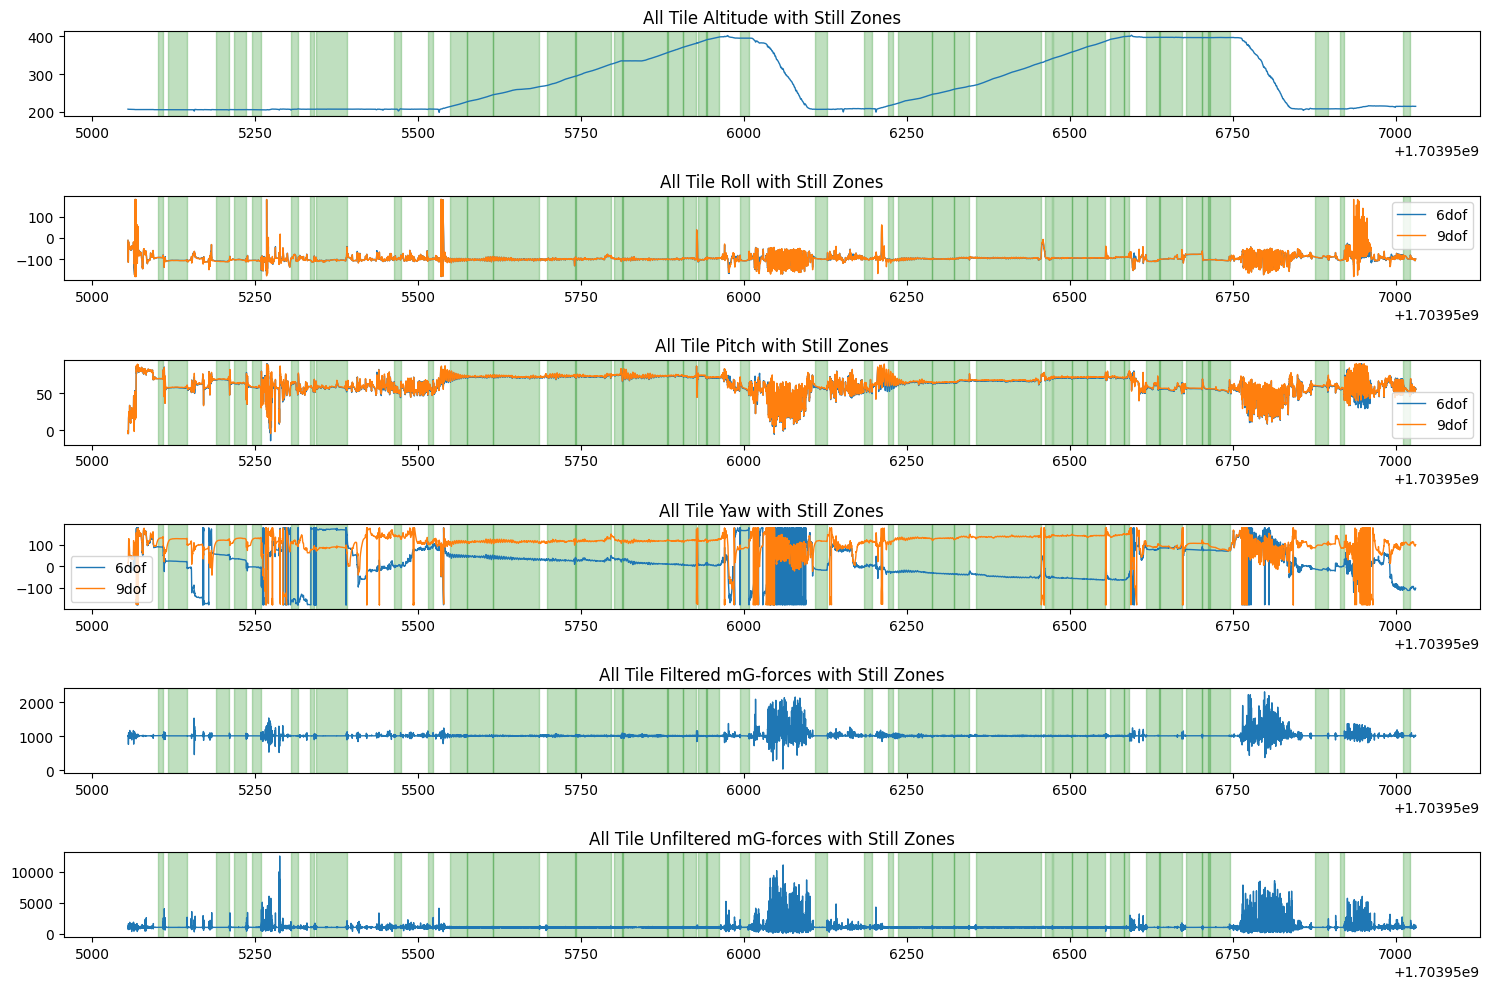

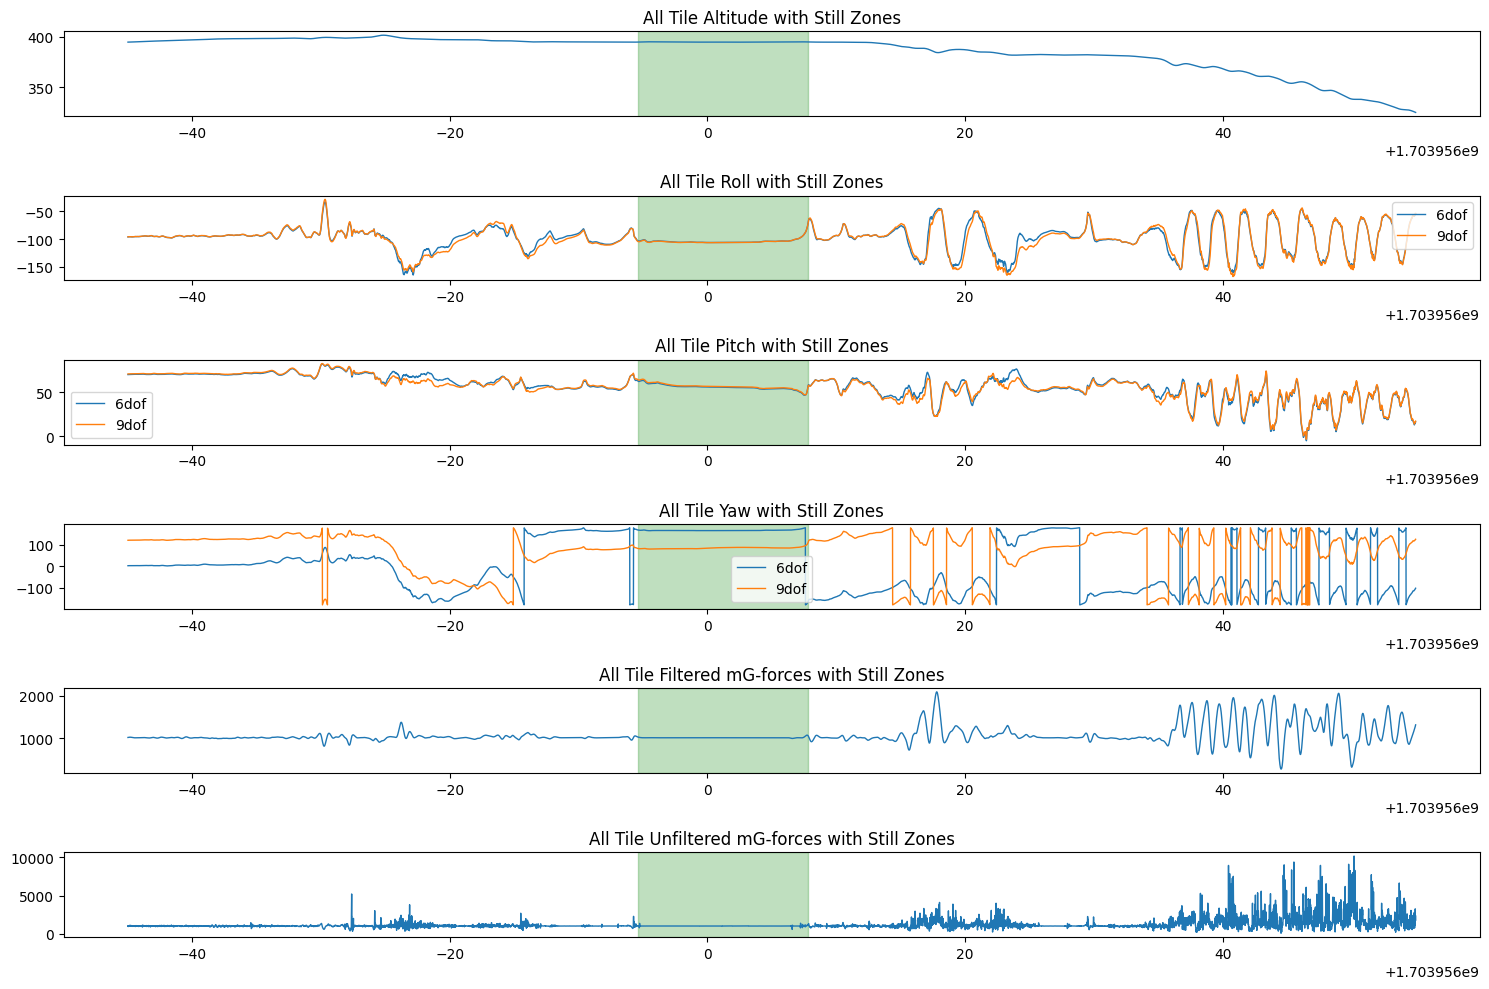

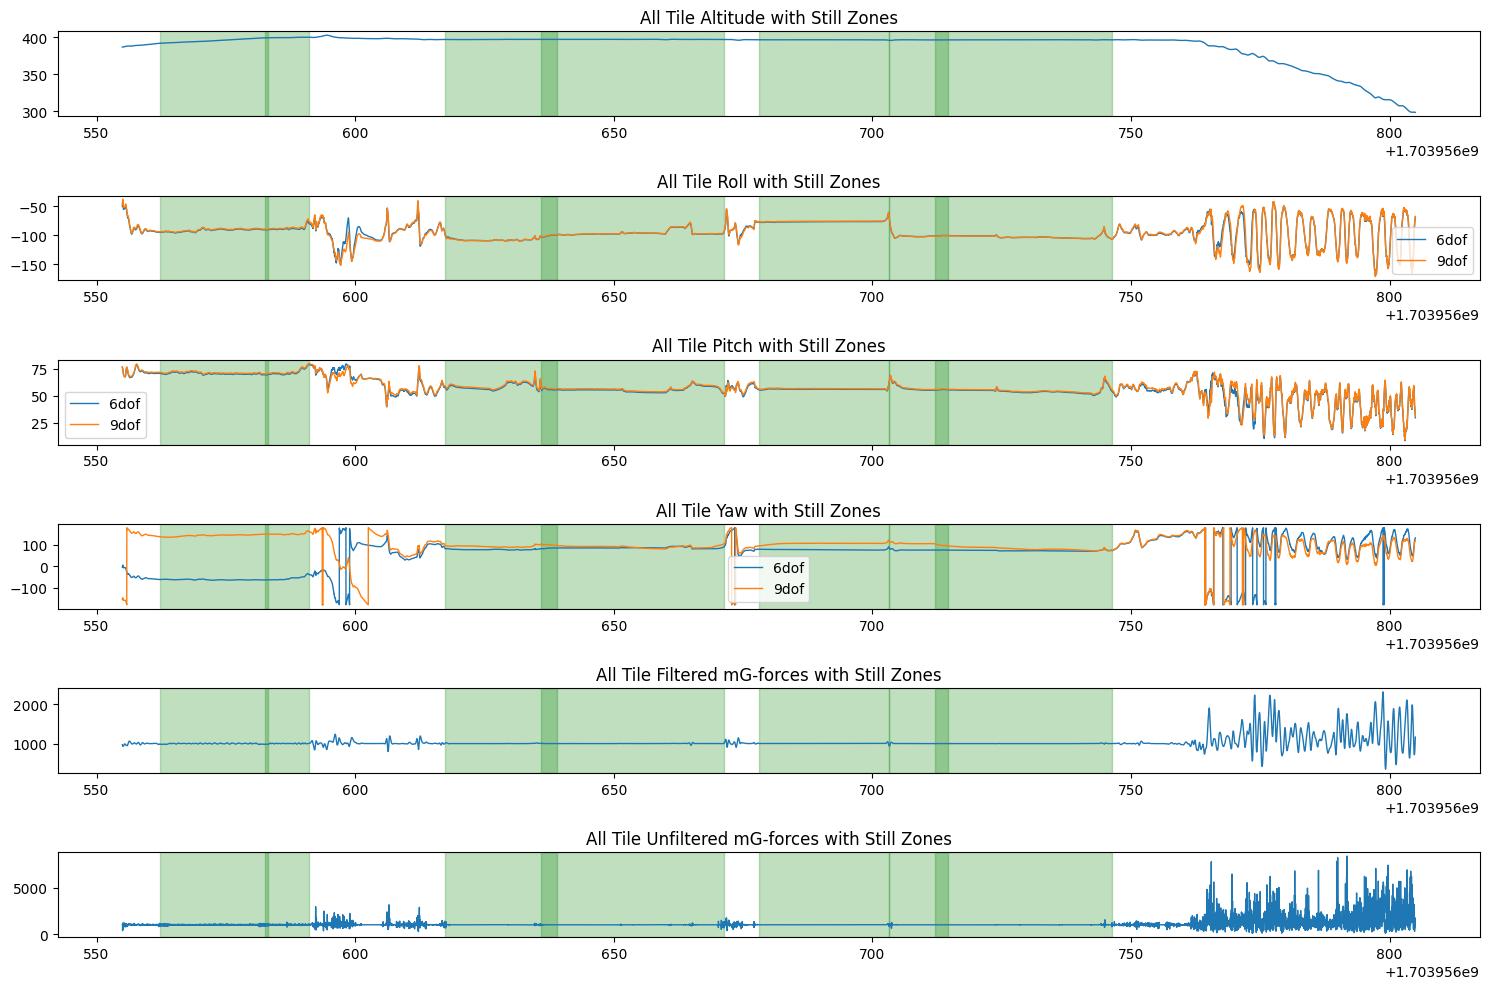

In [75]:
plotTileWithStillZones(tile_2023_12_30)
plotTileWithStillZones(tile_2023_12_30, [90000, 100000])
plotTileWithStillZones(tile_2023_12_30, [150000, 175000])

#### Identify Still Motion Directly After Max Alt

- search back for an impulse in mG
- " " " a max altitude happened recently which has begun to decline

In [22]:
# find all points of still motion within a window

